In [3]:
import numpy as np # for Linear Algebra
import pandas as pd # for data processing 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df = df.iloc[:,2:]


In [9]:
df.sample(5)

,Age,EstimatedSalary,Purchased
249,35,97000,1
94,29,83000,0
384,57,33000,1
330,38,51000,0
223,60,102000,1


# Train-Test Split
Train-test split is a technique used in machine learning to divide a dataset into two parts:
- Training set – Used to train the model so it can learn patterns in the data.
- Test set – Used to evaluate the model’s performance on new, unseen data.


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                   df['Purchased'], test_size = 0.3, 
                                                   random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [19]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [23]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [25]:
# Comparison of X_train dataset with scaled X_train dataset
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [27]:
np.round(X_train_scaled.describe(), 1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling


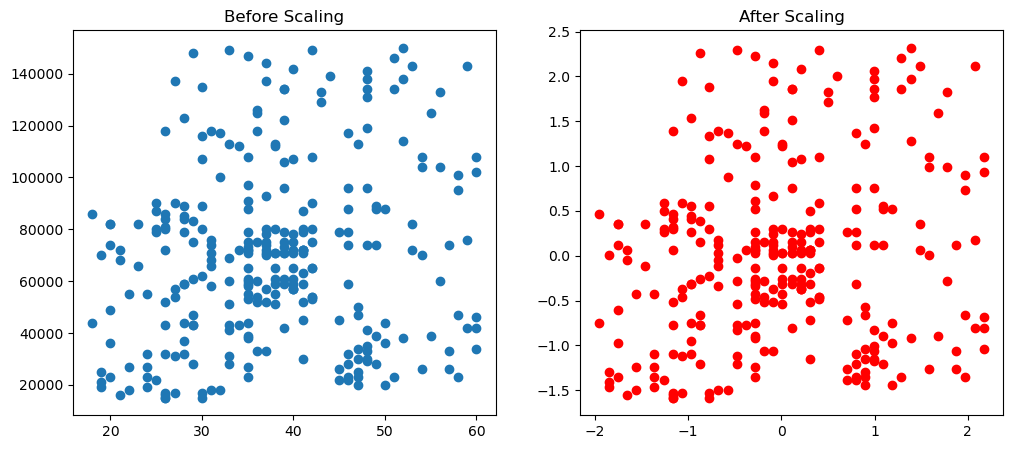

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()
#This visualization helps compare data before and after feature scaling to understand the effect of standardization.

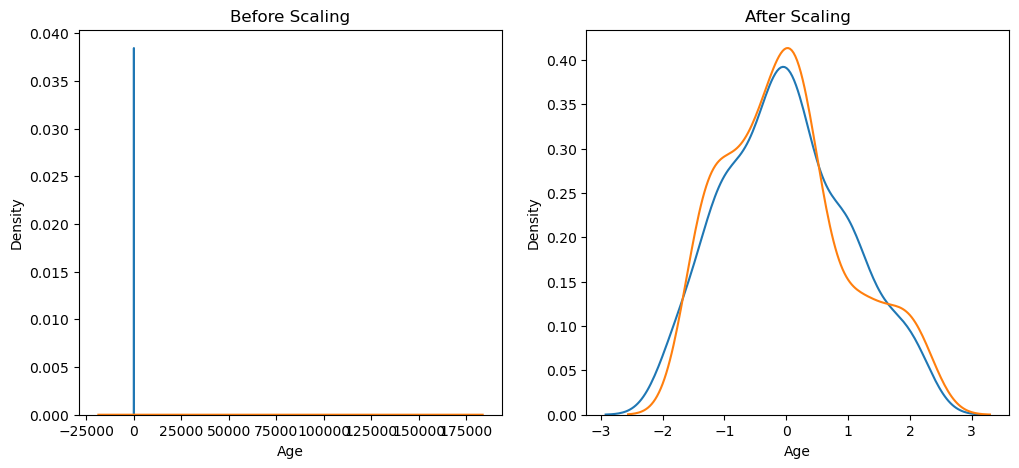

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)



plt.show()

# Comparison of Distribution
## a. Age

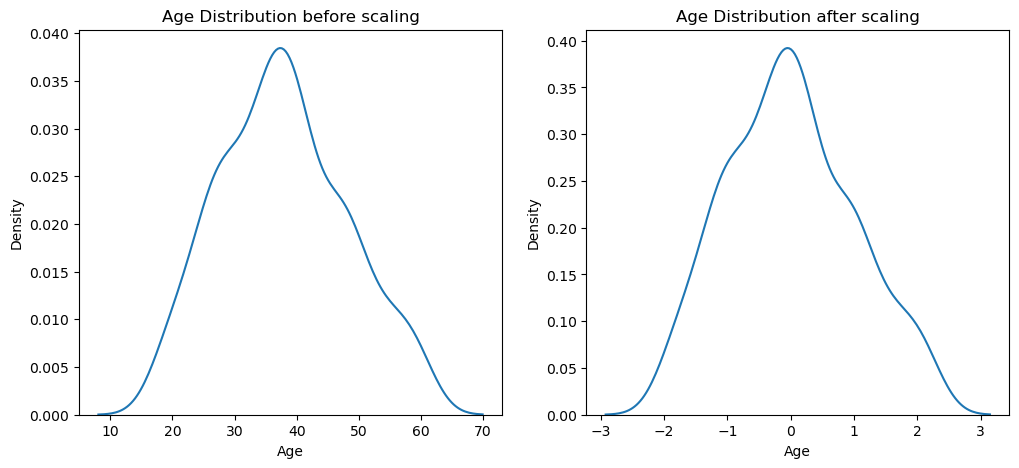

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

# After scaling
ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

plt.show()

## b. EstimaedSalary

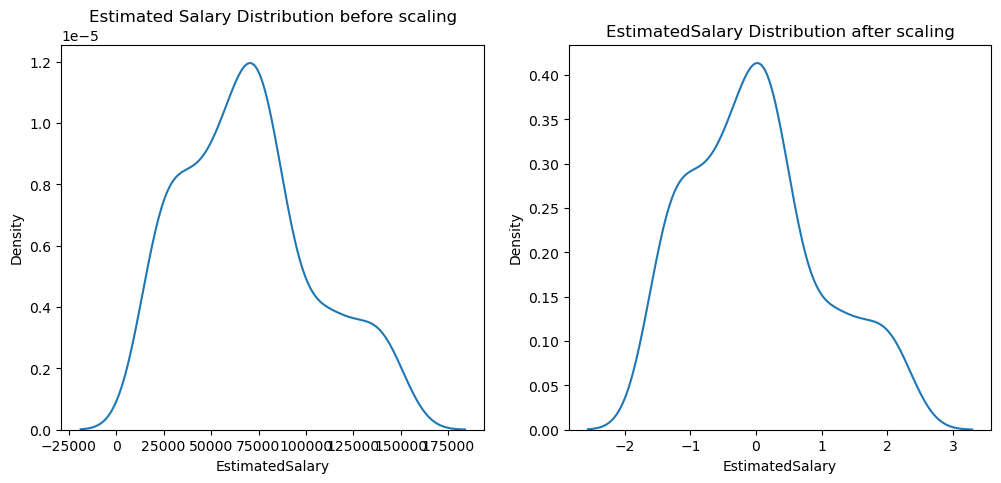

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Estimated Salary Distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# After scaling
ax2.set_title('EstimatedSalary Distribution after scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Why Scaling is important?

## Understanding importance of scaling by using logistic regression algorithm 

In [41]:
from sklearn.linear_model import LogisticRegression


In [42]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [45]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)


LogisticRegression()

In [47]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [49]:
from sklearn.metrics import accuracy_score

In [51]:
print('Actual Accuracy Score', accuracy_score(Y_test, y_pred))
print(f"Scaled Accuracy score, {accuracy_score(Y_test, y_pred_scaled)}")
# in this case scaling doesn't affect the accuracy of the algorithm but overall scaling is more efficient 

Actual Accuracy Score 0.875
Scaled Accuracy score, 0.8666666666666667


In [53]:
from sklearn.tree import DecisionTreeClassifier


In [57]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [59]:
dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [63]:
y_pred = dt.predict(X_test)
y_scaled_pred = dt_scaled.predict(X_test_scaled)

In [69]:
print(f"Acctual : {accuracy_score(Y_test, y_pred )}" )
print(f"Scaled : {accuracy_score(Y_test, y_scaled_pred )}" )
# In decision tree the actual and scaled predict accuracy is same

Acctual : 0.875
Scaled : 0.875


In [71]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


 # Effect of Outlier

In [76]:
df = df._append(pd.DataFrame({
    'Age':[5, 90, 95], 'EstimatedSalary':[1000, 350000, 500000], 'Purchased':[0, 1, 1]
}), ignore_index = True)


In [78]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,350000,1


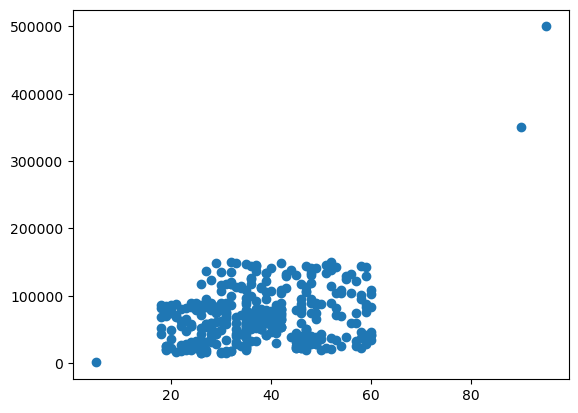

In [82]:
 plt.scatter(df['Age'], df['EstimatedSalary'])
# Since, it shows that the outliers if scaled doesn't affected their properties therefore outliers must be handled after or before the standardization

# When to use Standardization
1. K-Means -> Use the Eucledean distance measure
2. K-Nearest-Neighbours -> Measure the distance between pair of samples and these distances are influenced by the measurement units
3. Principal Component Analysis(PCA) -> Try to get the feature with maximum variance
4. Artificial Neural Network -> Apply Gradient Descent
5. Gradient Descent -> Theta calculation becomes faster after featuring scaling and the learning rate in the update equation of the stochastic Gradient Descent is same for every parameter 